#  Movie Genre Classification

# Methodology:
1. Data Collection
2. Data Cleaning and Text Preprocessing
3. Data Visualization
4. Feature Engineering
5. Model Selection
6. Model Training and Evaluation

# Import necessary libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

# modelling lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb


#Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score

In [23]:
import os
path="/kaggle/input/fraud-detection"
os.chdir(path)

# 1. Data Collection

In [54]:
# Read data
data = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")

In [25]:
## View train data 
print("shape",data.shape)
data.head()

shape (1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [55]:
df=data

In [56]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [57]:
# find number of numeric columns 
df.select_dtypes(include=['int64','float64']).columns

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [58]:
#Find a categorical columns
df.select_dtypes(include=['object']).columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

<Axes: >

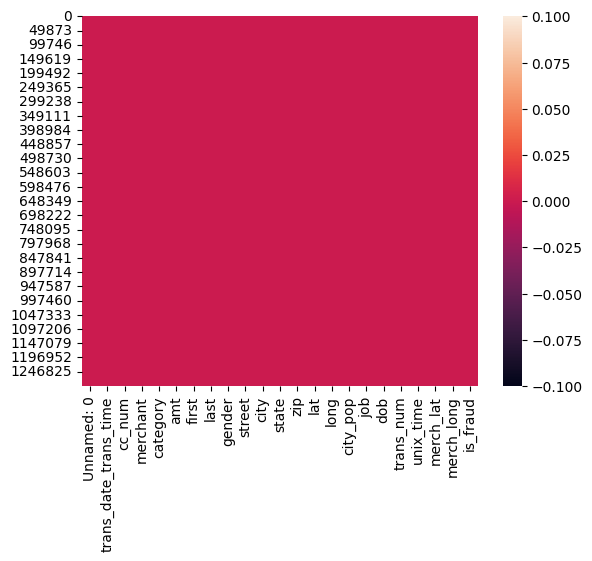

In [29]:
# find a null value
sns.heatmap(df.isnull())

In [59]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [32]:
df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [33]:
df['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [60]:
df['state'].value_counts()

state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64

# 2. Exploratory Data Analysis

#  Transaction amount vs Fraud

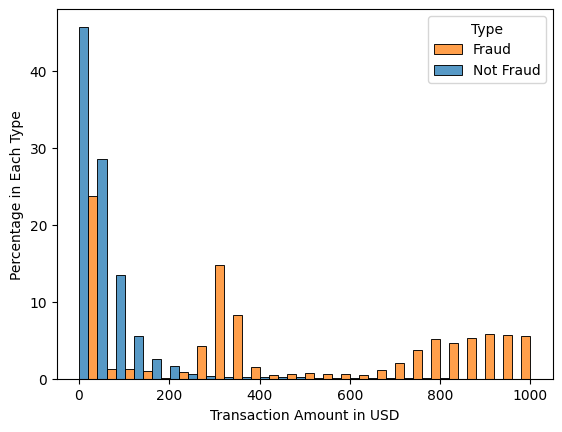

In [39]:
#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# 2. Gender vs Fraud

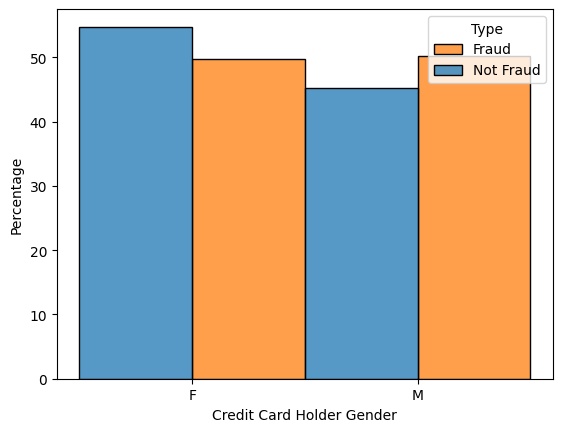

In [40]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [43]:
!pip install plotly-express

#  Age vs Fraud

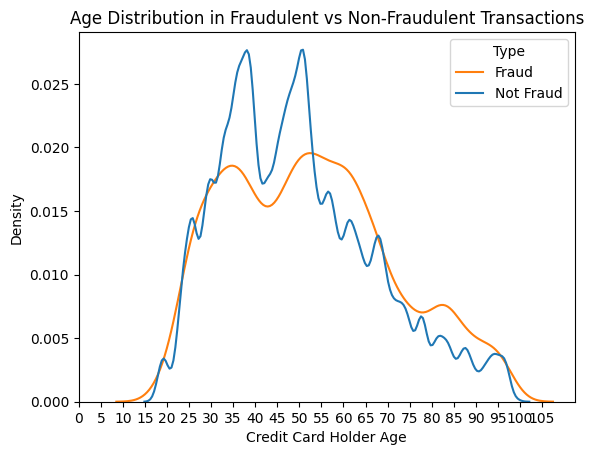

In [61]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# Hourly Trend

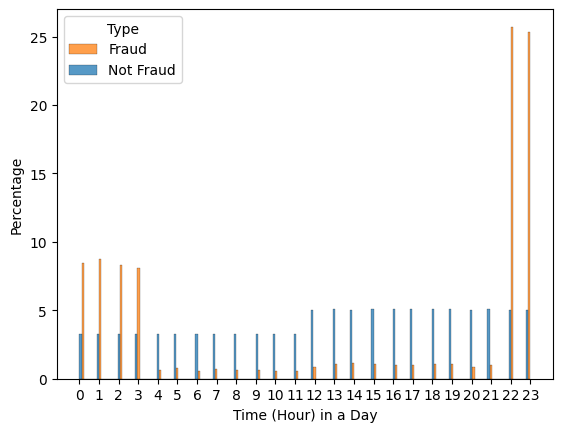

In [62]:
#time in a day vs fraud
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# Weekly Trend

/tmp/ipykernel_84/3206469556.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


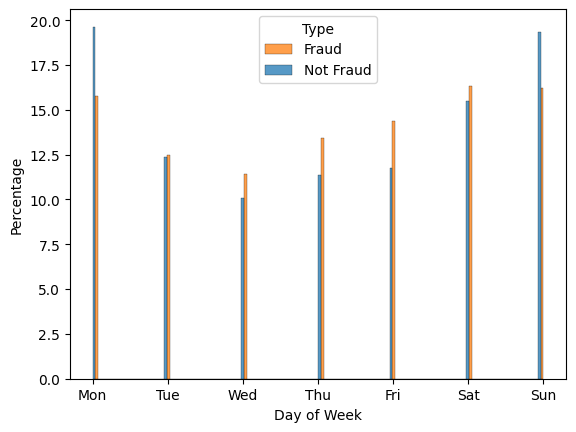

In [65]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [66]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,56,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,62,12,6
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,44,12,6
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,56,12,6
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,43,12,6


In [69]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'hour', 'day'],
      dtype='object')

In [92]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])
data['category']

class_names= list(label_encoder.classes_)
class_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [71]:
data['gender'] = label_encoder.fit_transform(data['gender'])
data['gender']

class_names= list(label_encoder.classes_)
class_names

['F', 'M']

In [90]:
#let's do the same to the testing dataset
test=pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month
test=test[['category','gender','amt','age','hour','day','month','is_fraud']]

In [93]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test['category'] = label_encoder.fit_transform(test['category'])
test['category']

class_names= list(label_encoder.classes_)
class_names

['entertainment',
 'food_dining',
 'gas_transport',
 'grocery_net',
 'grocery_pos',
 'health_fitness',
 'home',
 'kids_pets',
 'misc_net',
 'misc_pos',
 'personal_care',
 'shopping_net',
 'shopping_pos',
 'travel']

In [96]:
test['gender'] = label_encoder.fit_transform(test['gender'])
test['gender']

class_names= list(label_encoder.classes_)
class_names

['F', 'M']

In [97]:
test

,category,gender,amt,age,hour,day,month,is_fraud
0,10,1,2.86,55,12,6,6,0
1,10,0,29.84,33,12,6,6,0
2,5,0,41.28,53,12,6,6,0
3,9,1,60.05,36,12,6,6,0
4,13,1,3.19,68,12,6,6,0
...,...,...,...,...,...,...,...,...
555714,5,1,43.77,57,23,3,12,0
555715,7,1,111.84,24,23,3,12,0
555716,7,0,86.88,42,23,3,12,0
555717,13,1,7.99,58,23,3,12,0


<Axes: >

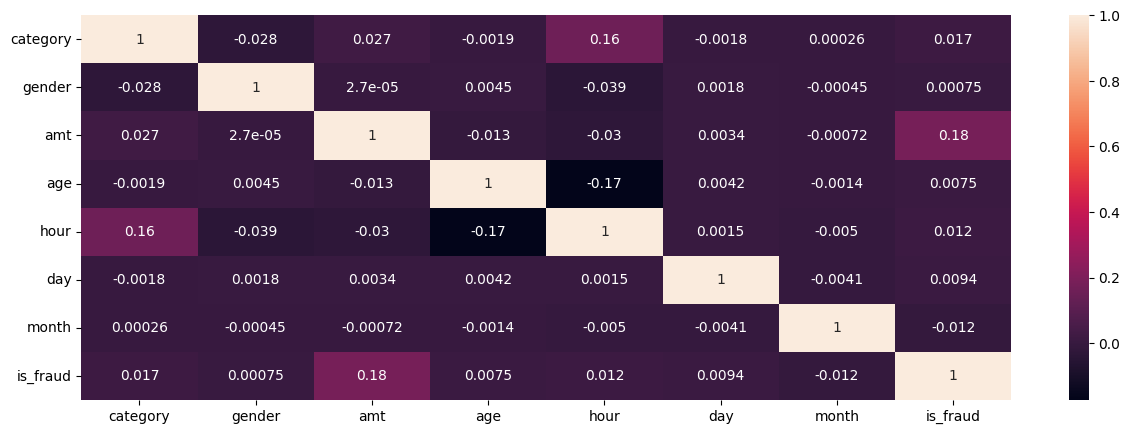

In [98]:
plt.figure(figsize=(15,5))
sns.heatmap(test.corr(),annot=True)

In [102]:
x = test.drop(['is_fraud'], axis = 1)
y= test['is_fraud']

# important feature using extratreeregressor

In [103]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [104]:
print(selection.feature_importances_)

[0.21337428 0.02577115 0.4470793  0.16914138 0.06759961 0.03754791
 0.03948637]


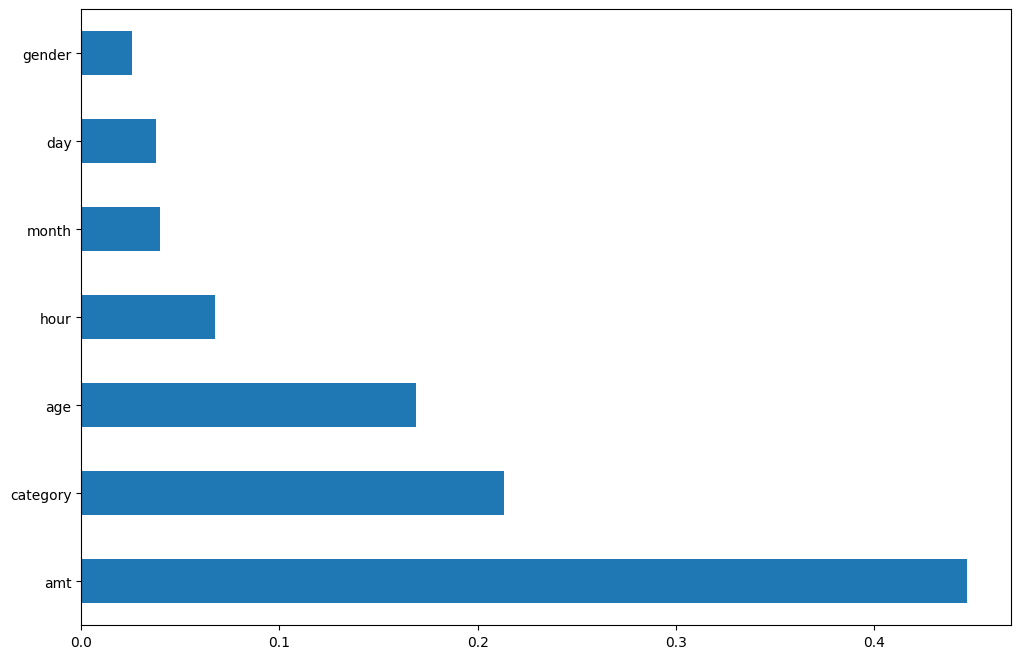

In [105]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Modeling

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.30, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (389003, 7)
Testing Data Shape:  (166716, 7)


In [107]:
#  LogisticRegression
lr = LogisticRegression()
print(lr.fit(X_train , Y_train))

#  DecisionTreeClassifier()
dt = DecisionTreeClassifier()
print(dt.fit(X_train , Y_train))


#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=100)
print(rf.fit(X_train , Y_train))

#SVM
svm = LinearSVC(random_state=100)
print(svm.fit(X_train , Y_train))

#Naive Bayes
nb = MultinomialNB()
print(nb.fit(X_train , Y_train))
#KNeighborsClassifier
kn=KNeighborsClassifier()
print(kn.fit(X_train , Y_train))

# Initialize the XGBoost classifier
xgb = xgb.XGBClassifier(
    n_estimators=100,  # number of trees (adjust as needed)
    max_depth=3,  # maximum depth of each tree (adjust as needed)
    learning_rate=0.1  # learning rate (adjust as needed)
)

# Train the model
xgb.fit(X_train , Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier(random_state=100)


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=100)
MultinomialNB()
KNeighborsClassifier()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [136]:
df

[['category', 'gender', 'age', 'hour', 'day', 'month', 'is_fraud']]

In [108]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_kn = kn.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


# campare All model Accuracy

In [112]:
from sklearn import metrics
LogisticRegression=metrics.accuracy_score(Y_test,y_pred_lr)
DecisionTreeClassifier=metrics.accuracy_score(Y_test,y_pred_dt)
RandomForestClassifier=metrics.accuracy_score(Y_test,y_pred_rf)
LinearSVC=metrics.accuracy_score(Y_test,y_pred_svm)
MultinomialNB=metrics.accuracy_score(Y_test,y_pred_nb)
KNeighborsClassifier=metrics.accuracy_score(Y_test,y_pred_kn)
XGBoostclassifier=metrics.accuracy_score(Y_test,y_pred_xgb)

In [113]:
compare_accuracy=pd.DataFrame({'Model':['RF','Dt','SVC','NB','XGB','LG','KN'],'ACC':[RandomForestClassifier,DecisionTreeClassifier, LinearSVC,MultinomialNB,XGBoostclassifier,LogisticRegression,KNeighborsClassifier]})

In [114]:
compare_accuracy

,Model,ACC
0,RF,0.998608
1,Dt,0.997907
2,SVC,0.995849
3,NB,0.936107
4,XGB,0.998135
5,LG,0.995843
6,KN,0.997361


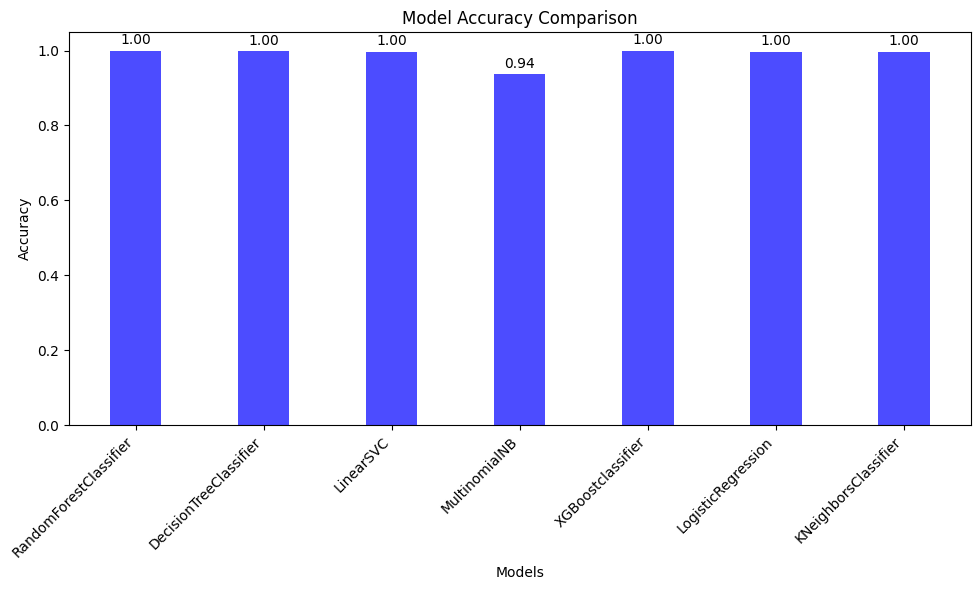

In [115]:

def plot_accuracy(models, accuracies):
    """
    Plot the accuracy of multiple models.

    Parameters:
    - models (list): A list of model names.
    - accuracies (list): A list of accuracy values corresponding to the models.
    """
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate evenly spaced x-coordinates for each model
    x = np.arange(len(models))

    # Plot the accuracy values as bars
    ax.bar(x, accuracies, width=0.4, align='center', alpha=0.7, color='b')

    # Set the x-axis labels to be the model names
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')

    # Set axis labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Model Accuracy Comparison')

    # Display the accuracy values on top of the bars
    for i, acc in enumerate(accuracies):
        ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
models = ['RandomForestClassifier','DecisionTreeClassifier','LinearSVC','MultinomialNB','XGBoostclassifier','LogisticRegression','KNeighborsClassifier']
accuracies = [RandomForestClassifier,DecisionTreeClassifier, LinearSVC,MultinomialNB,XGBoostclassifier,LogisticRegression,KNeighborsClassifier]

plot_accuracy(models, accuracies)


# campare All precision Accuracy Score

In [116]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [117]:
LR_pc= precision_score(Y_test,y_pred_lr)
Dt_pc= precision_score(Y_test,y_pred_dt)
RF_pc= precision_score(Y_test,y_pred_rf)
SVM_pc= precision_score(Y_test,y_pred_svm)
NB_pc= precision_score(Y_test,y_pred_nb)
KNN_pcr=precision_score(Y_test,y_pred_kn)
xgb_pc=precision_score(Y_test,y_pred_xgb)

In [118]:
compare_prec=pd.DataFrame({'Model':['LR','Dt','Rf','SVM','NB','KNN','XGB'],'precision':[LR_pc,Dt_pc,RF_pc,SVM_pc,NB_pc,KNN_pcr,xgb_pc]})

In [119]:
compare_prec

,Model,precision
0,LR,0.000000
1,Dt,0.713656
2,Rf,0.953333
3,SVM,0.000000
4,NB,0.044163
5,KNN,0.753807
6,XGB,0.898305


<Axes: xlabel='Model', ylabel='precision'>

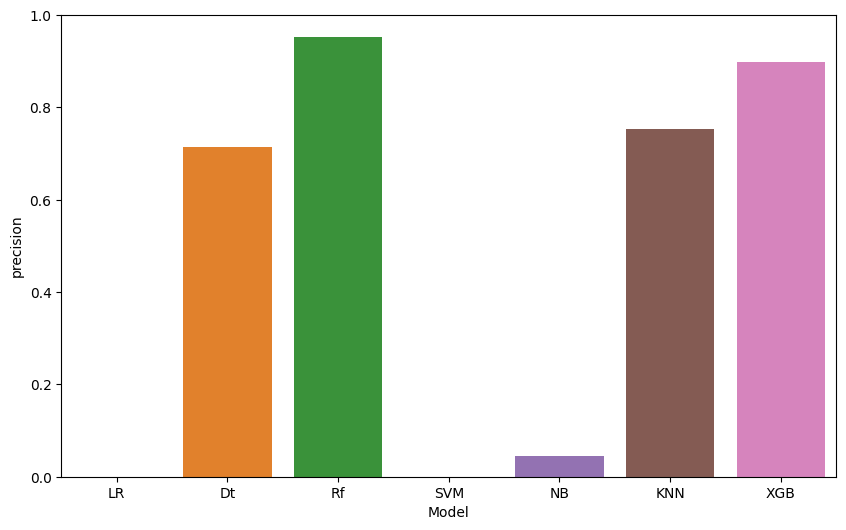

In [120]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
# Equivalent to:
sns.barplot(x = "Model", y = "precision", data = compare_prec)

# campare All Recall Score Accuracy Score

In [121]:
LR_RC= recall_score(Y_test,y_pred_lr)
Dt_RC= recall_score(Y_test,y_pred_dt)
RF_RC= recall_score(Y_test,y_pred_rf)
SVM_RC= recall_score(Y_test,y_pred_svm)
NB_RC= recall_score(Y_test,y_pred_nb)
KNN_RC=recall_score(Y_test,y_pred_kn)
xgb_RC=recall_score(Y_test,y_pred_xgb)

In [122]:
compare_Recall=pd.DataFrame({'Model':['LR','Dt','Rf','SVM','NB','KNN','XGB'],'recall_score':[LR_RC,Dt_RC,RF_RC,SVM_RC,NB_RC,KNN_RC,xgb_RC]})

In [123]:
compare_Recall

,Model,recall_score
0,LR,0.000000
1,Dt,0.759375
2,Rf,0.670312
3,SVM,0.000000
4,NB,0.757812
5,KNN,0.464062
6,XGB,0.579688


<Axes: xlabel='Model', ylabel='recall_score'>

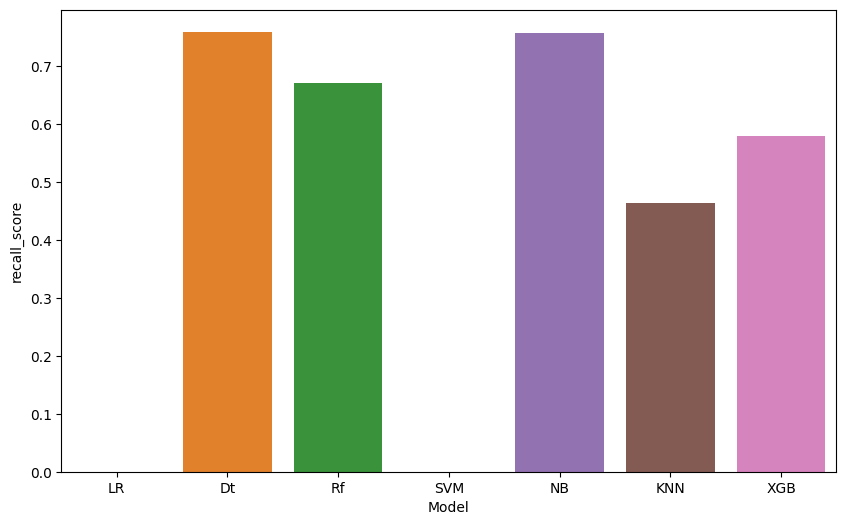

In [124]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
# Equivalent to:
sns.barplot(x = "Model", y = "recall_score", data =compare_Recall )

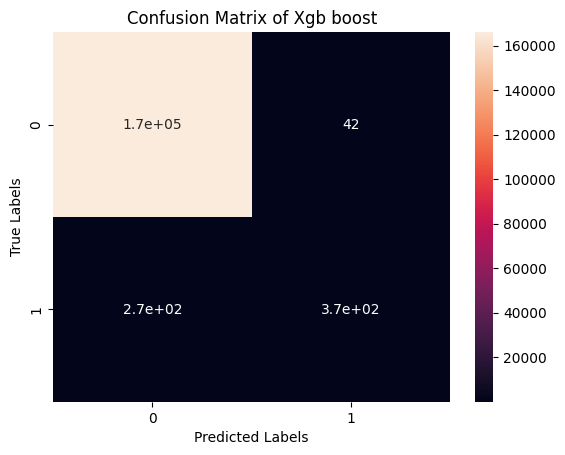

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_xgb)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Xgb boost')
plt.show()

In [127]:
report_xgb= classification_report(Y_test,y_pred_xgb)
print("Classification report of xgb:\n", report_xgb)

Classification report of xgb:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.90      0.58      0.70       640

    accuracy                           1.00    166716
   macro avg       0.95      0.79      0.85    166716
weighted avg       1.00      1.00      1.00    166716



In [152]:
test[test['is_fraud']==1]

,category,gender,amt,age,hour,day,month,is_fraud
1685,5,0,24.84,54,22,6,6,1
1767,8,1,780.52,65,22,6,6,1
1781,0,1,620.33,65,22,6,6,1
1784,11,1,1077.69,29,22,6,6,1
1857,12,0,842.65,54,23,6,6,1
...,...,...,...,...,...,...,...,...
517197,12,1,1041.51,64,22,1,12,1
517274,12,1,868.09,64,22,1,12,1
517341,11,1,1039.42,64,22,1,12,1
517529,4,1,289.27,64,23,1,12,1


In [160]:

prediction = rf.predict([[0,1,620,65,22,6,6]])
if prediction == 1:
    print("fraud")
else:
    print("Not fraud")

fraud


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [161]:
import os
# Change the working directory to a new path
new_directory = "/kaggle/working/"
os.chdir(new_directory)

In [162]:
import pickle
pickle.dump(rf ,open('model.pkl' , 'wb'))